In [1]:
#packages
import gensim
import os
import smart_open
import pickle
import pandas as pd
import numpy as np
import random
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [28]:
#Data directories

tweets_dir = os.listdir("dataverse_files/Tweets/")

N_tweets_dir = [txt for txt in tweets_dir if txt[0]=='N']
R_tweets_dir = [txt for txt in tweets_dir if txt[0]=='R']

user_info_dir = "dataverse_files/sub_user_info_share.txt"

In [29]:
def read_corpus(file, tokens_only=False):
    with smart_open.smart_open("dataverse_files/Tweets/"+file) as f:
        for i, line in enumerate(f):
            if tokens_only:
                yield gensim.utils.simple_preprocess(line)
            else:
                yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(line), [i])

In [30]:
N_tweets = pd.read_pickle("N_tweets_dataframe.pkl")
R_tweets = pd.read_pickle("R_tweets_dataframe.pkl")

In [31]:
N_tweets.head()

,userid,tweetid,content,time,topic
0,5837040,2205136359,Three more arrests in Vanessa George child por...,2009-06-17 11:02:46,N_Vanessa
1,38384087,2128965617,OMFFG Senator Ted Kennedy is Vanessa George Bu...,2009-06-12 08:11:57,N_Vanessa
2,26282884,2108680927,just listening to the news about the nursery w...,2009-06-10 21:34:44,N_Vanessa
3,56013357,2104767069,Pornograf237a infantil y penetraciones en una ...,2009-06-10 16:00:24,N_Vanessa
4,45344579,2129943277,PS i was talking about that bitch vanessa geo...,2009-06-12 11:02:36,N_Vanessa


In [32]:
def read_corpus(dataframe, tokens_only=False):
    for i in range(len(dataframe)):
        try:
            if tokens_only:
                yield gensim.utils.simple_preprocess(dataframe.content[i])
            else:
                yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(dataframe.content[i]), [dataframe.topic[i]+"_{}".format(i)])
        except:
            pass

In [33]:
N_corpus = list(read_corpus(N_tweets))
R_corpus = list(read_corpus(R_tweets))

In [34]:
N_corpus[:5]

[TaggedDocument(words=['three', 'more', 'arrests', 'in', 'vanessa', 'george', 'child', 'porn', 'probe'], tags=['N_Vanessa_0']),
 TaggedDocument(words=['omffg', 'senator', 'ted', 'kennedy', 'is', 'vanessa', 'george', 'bushamp', 'father', 'washington', 'acdc', 'lurid', 'cold', 'whore', 'ass', 'mess'], tags=['N_Vanessa_1']),
 TaggedDocument(words=['just', 'listening', 'to', 'the', 'news', 'about', 'the', 'nursery', 'worker', 'from', 'plymouth', 'vanessa', 'george', 'know', 'they', 'are', 'allegations', 'but', 'it', 'makes', 'me', 'feel', 'sick'], tags=['N_Vanessa_2']),
 TaggedDocument(words=['pornograf', 'infantil', 'penetraciones', 'en', 'una', 'guarder', 'vanessa', 'george', 'que', 'trabajaba', 'diariamente', 'con', 'ni', 'os', 'en'], tags=['N_Vanessa_3']),
 TaggedDocument(words=['ps', 'was', 'talking', 'about', 'that', 'bitch', 'vanessa', 'george'], tags=['N_Vanessa_4'])]

In [46]:
model = gensim.models.doc2vec.Doc2Vec(N_corpus+R_corpus, dm=1, vector_size = 300, min_count = 3, epochs=50, hs=0)
# model.build_vocab(N_corpus+R_corpus)

In [47]:
%time model.train(N_corpus+R_corpus, total_examples=model.corpus_count, epochs=model.epochs)

CPU times: user 12min 27s, sys: 3min 2s, total: 15min 30s
Wall time: 8min 44s


In [49]:
model.save('epoch_1\50')

In [247]:
model.docvecs.index2entity[3]

'N_Vanessa_3'

In [253]:
model.docvecs.most_similar('N_Vanessa_3')

[('N_Vanessa_100', 0.935368001461029),
 ('N_Vanessa_42', 0.9193093776702881),
 ('N_Vanessa_35', 0.8999717831611633),
 ('N_Georgetiller_23153', 0.8978791236877441),
 ('N_ChristianTheLion_67716', 0.8974472284317017),
 ('N_Vanessa_60', 0.8967622518539429),
 ('N_josefFritzl_117750', 0.8918148279190063),
 ('N_Vanessa_30', 0.8900991678237915),
 ('N_Georgetiller_22247', 0.8851905465126038),
 ('R_IphoneNano_12124', 0.8843801021575928)]

In [73]:
N_tweets.head()

,userid,tweetid,content,time,topic
0,5837040,2205136359,Three more arrests in Vanessa George child por...,2009-06-17 11:02:46,N_Vanessa
1,38384087,2128965617,OMFFG Senator Ted Kennedy is Vanessa George Bu...,2009-06-12 08:11:57,N_Vanessa
2,26282884,2108680927,just listening to the news about the nursery w...,2009-06-10 21:34:44,N_Vanessa
3,56013357,2104767069,Pornograf237a infantil y penetraciones en una ...,2009-06-10 16:00:24,N_Vanessa
4,45344579,2129943277,PS i was talking about that bitch vanessa geo...,2009-06-12 11:02:36,N_Vanessa


In [259]:
model.docvecs.vectors_docs.shape

(192350, 200)

In [258]:
len(N_corpus+R_corpus)

192350

In [28]:
index = random.randint(0, len(R_tweets))
inferred = model.infer_vector(R_tweets.content[index].split())
sims = model.docvecs.most_similar([inferred], topn=len(model.docvecs))

print("test topic: ", R_tweets.topic[index])
print("test doc: ", R_tweets.content[index])
print("Similar/Dissimilar Docs", model)
print("")
for label, idx in [("MOST", 0), ("MEDIAN", len(sims)//2), ("LEAST", len(sims)-1)]:
    print(label, sims[idx])
    print("")

test topic:  R_SwinePork
test doc:  Im going to eat pork rinds tonight in honor of the swine flu  Ill drink coffee too  Get it coughy coffee  ha ha he he
Similar/Dissimilar Docs Doc2Vec(dm/m,d300,n5,w5,mc3,s0.001,t3)

MOST ('R_SwinePork_54518', 0.6643348336219788)

MEDIAN ('N_Georgetiller_21038', 0.021023837849497795)

LEAST ('N_Georgetiller_23890', -0.36068105697631836)



In [261]:
model.wv.most_similar('great')

[('good', 0.6653050780296326),
 ('awesome', 0.627468466758728),
 ('nice', 0.6062361001968384),
 ('amazing', 0.6061592102050781),
 ('cool', 0.6014693975448608),
 ('fantastic', 0.5866733193397522),
 ('interesting', 0.5514722466468811),
 ('excellent', 0.5328853130340576),
 ('brilliant', 0.5302197337150574),
 ('bad', 0.49478811025619507)]

In [15]:
list(model.docvecs.doctags.items())[50][0][0]

'N'

In [6]:
model = gensim.models.Doc2Vec.load("epoch_50")

In [7]:
len(model.docvecs.doctags.items())

192350

In [9]:
viz_words = 1000
idx_list = list(range(192350))[::1000]
word_vector=model.docvecs.vectors_docs[idx_list]
tsne = TSNE(n_components=3)
embed_tsne = tsne.fit_transform(word_vector)

In [10]:
topic_list = list(model.docvecs.doctags.items())
topic_idx = [topic_list[i] for i in idx_list]

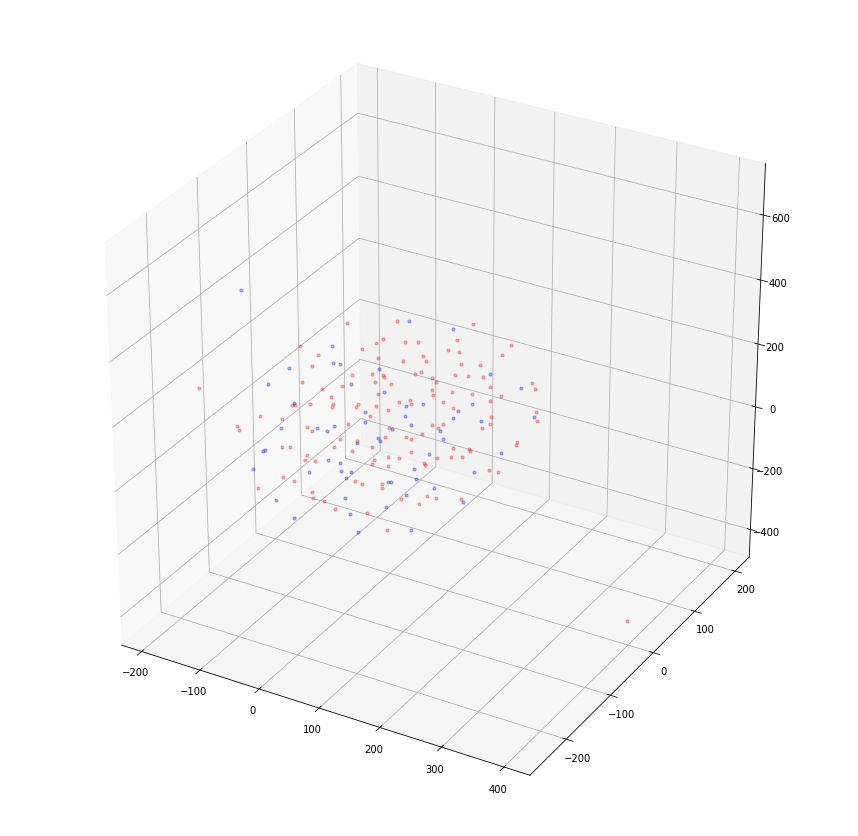

In [11]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
for i,idx in enumerate(idx_list):
    if topic_idx[i][0][0]=='N':
        plt.scatter(embed_tsne[i][0], embed_tsne[i][1],zs=embed_tsne[i][2],zdir='z',s=10,c='r',alpha=0.3)
        #plt.annotate(topic_list[i][0],(embed_tsne[i,0], embed_tsne[i,1]),fontsize=7)
    else:
        plt.scatter(embed_tsne[i,0],embed_tsne[i,1],zs=embed_tsne[i,2],s=10,c='b',alpha=0.3)
        #plt.annotate(topic_list[i][0],(embed_tsne[i,0], embed_tsne[i,1]),fontsize=7)

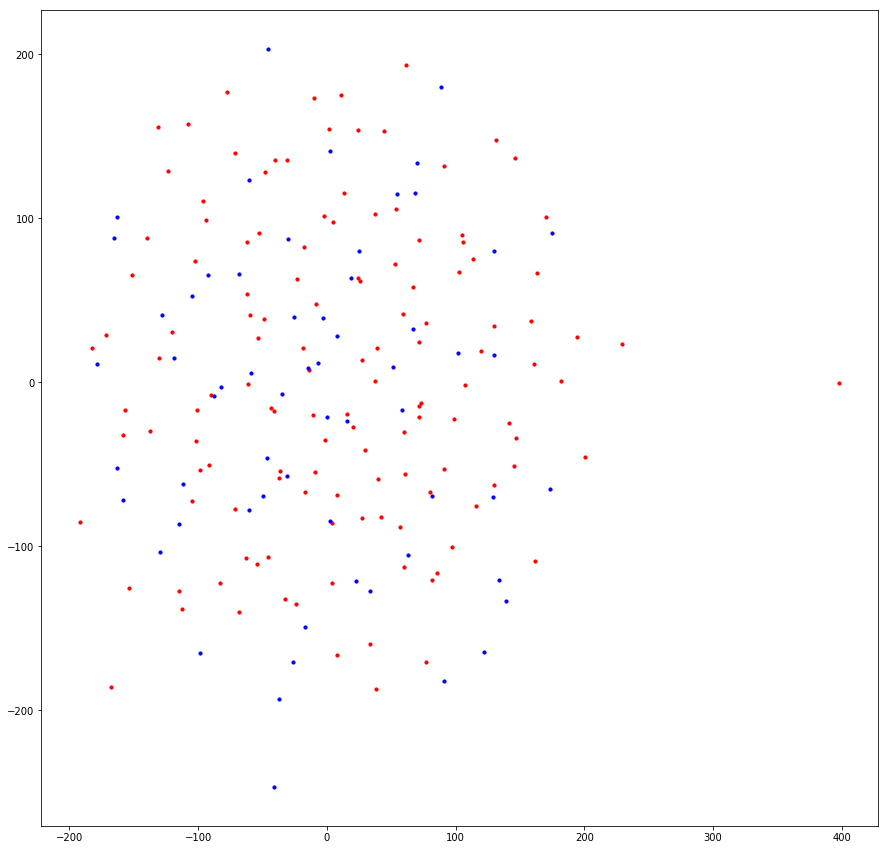

In [12]:
fig = plt.figure(figsize=(15,15))
for i,idx in enumerate(idx_list):
    if topic_idx[i][0][0]=='N':
        plt.scatter(embed_tsne[i][0], embed_tsne[i][1],s=10,c='r')
        #plt.annotate(topic_list[i][0],(embed_tsne[i,0], embed_tsne[i,1]),fontsize=7)
    else:
        plt.scatter(embed_tsne[i,0],embed_tsne[i,1],s=10,c='b')
        #plt.annotate(topic_list[i][0],(embed_tsne[i,0], embed_tsne[i,1]),fontsize=7)

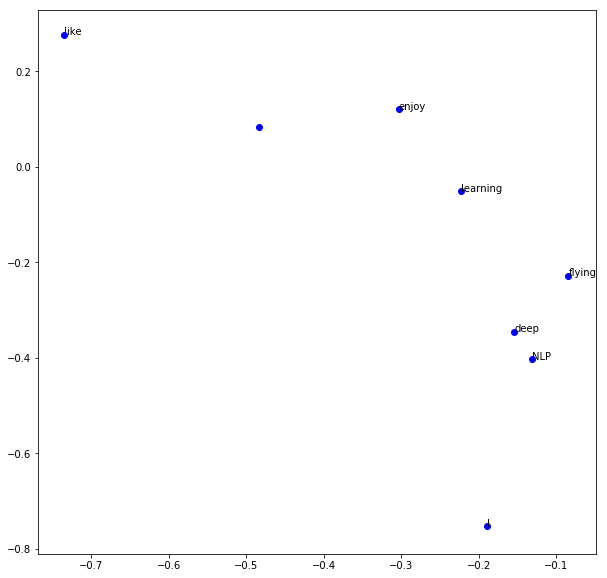

In [18]:
import numpy as np
import matplotlib.pyplot as plt
la = np.linalg
words = ["I", "like","enjoy","deep",
        "learning","NLP","flying","."]

X = np.array([[0,2,1,0,0,0,0,0],
              [2,0,0,1,0,1,0,0],
              [1,0,0,0,0,0,1,0],
              [0,1,0,0,1,0,0,0],
              [0,0,0,1,0,0,0,1],
              [0,1,0,0,0,0,0,1],
              [0,0,1,0,0,0,0,1],
              [0,0,0,1,1,1,1,0]])

U, s, Vh = la.svd(X, full_matrices=False)

plt.figure(figsize=(10,10))

for i in range(len(words)):
    plt.scatter(U[i,0], U[i,1],c='b')
    plt.text(U[i,0], U[i,1], words[i])